## Import libraries

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Fraud Detection/

/content/drive/MyDrive/Fraud Detection


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

----
## Exploring the Data

In [ ]:
# load the data 
df = pd.read_csv('creditcard.csv')

# show a few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# show datatype for each column and check if there is any null value in the dataset
df.info()
# show summary statistics for each column
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(283726, 31)

### Data Visualisation

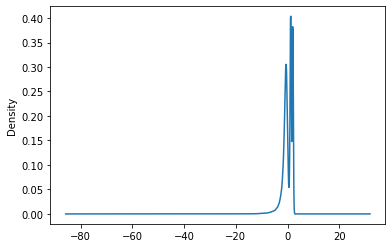

In [ ]:
# Density plot
df['V1'].plot.kde()

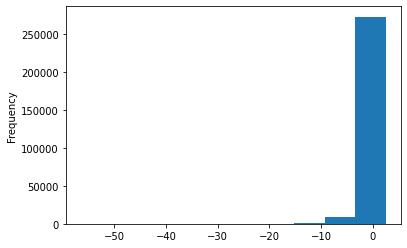

In [ ]:
# Histogram 
df['V1'].plot.hist()

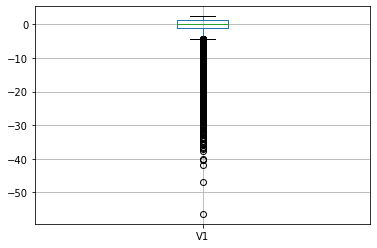

In [ ]:
# Box plot to check for outliers
df.boxplot(['V1'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02cb6168e0>,
      dtype=object)

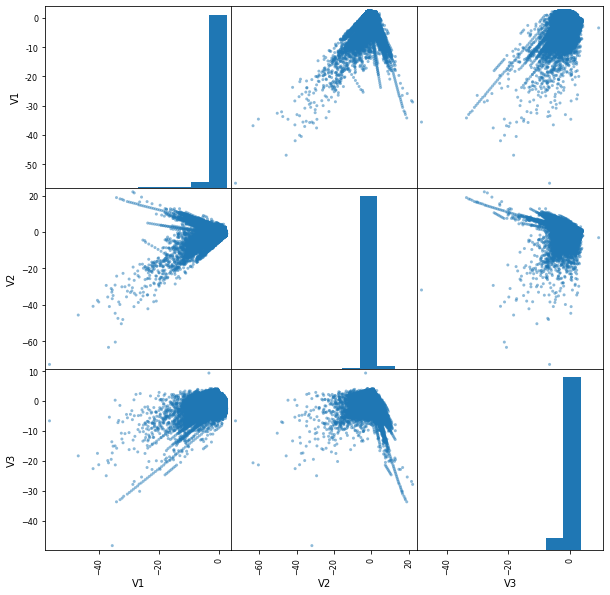

In [ ]:
# Scatter matrix of the first 3 features or variables
pd.plotting.scatter_matrix(df[['V1', 'V2', 'V3']], figsize=(10,10))

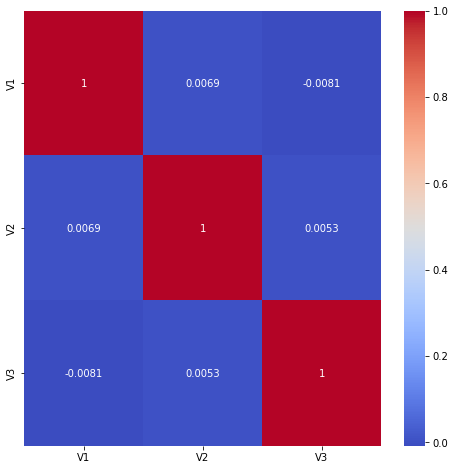

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 8))
col = df[['V1', 'V2', 'V3']]
sns.heatmap(col.corr(), annot=True, cmap='coolwarm')

----
## Preparing the Data

In [ ]:
# Split the data into features and target label
X = df.drop('Class', axis=1)
y = df['Class']
# check for imbalance in the labels
y.value_counts()

0    283253
1       473
Name: Class, dtype: int64

This shows that the training set has 283253 normal transactions and 473 fraudulent transactions

In [ ]:
# proportion
473/283253

0.0016698852262818046

### Feature scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # converts it to a numpy array
X_scaled[:3]

array([[-1.99682292, -0.70108232, -0.04168726,  1.68010106,  0.97662253,
        -0.24702025,  0.34801219,  0.19369982,  0.08443421,  0.33353384,
         0.08568786, -0.54166226, -0.62039108, -0.99654956, -0.32705029,
         1.60361453, -0.53973372,  0.24664646,  0.02898986,  0.49701081,
         0.32627339, -0.02477688,  0.38348342, -0.17744405,  0.11015694,
         0.24705862, -0.39262206,  0.33303251, -0.06584955,  0.24419951],
       [-1.99682292,  0.60879165,  0.16413764,  0.10927902,  0.31899751,
         0.04225842, -0.06098025, -0.06565626,  0.07290271, -0.23170344,
        -0.15378378,  1.5828957 ,  1.07165916,  0.49073534, -0.15125245,
         0.69354114,  0.52965296, -0.13646769, -0.22078066, -0.1789069 ,
        -0.08996344, -0.31137192, -0.8814542 ,  0.16208056, -0.56150312,
         0.32117529,  0.26085374, -0.0271543 ,  0.0432187 , -0.34258399],
       [-1.99680186, -0.7003364 , -0.81133678,  1.17426962,  0.27064835,
        -0.36675639,  1.3526546 ,  0.643223  ,  0

### Shuffle and Split Data
80% of the data will be used for training and 20% for validation. The best result will then be used to perform predictions on the test set later on.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=.2, stratify=y, random_state=0) 

# show the split result
print(f'Training set has {X_train.shape[0]} samples')
print(f'Validation set has {X_val.shape[0]} samples')

Training set has 226980 samples
Validation set has 56746 samples


In [ ]:
y_train.value_counts()

0    226602
1       378
Name: Class, dtype: int64

In [ ]:
378/226602 # approximately same as the proportion of y labels, due to stratify

0.001668122964492811

## Model Training

Use XGBClassifier to train the model

In [ ]:
# Hyperparameter tuning
classifier = XGBClassifier(tree_method='hist', use_label_encoder=False, verbosity=0)

params = {"learning_rate": [.05,.10,.15,.20,.25,.30], # boosting learning rate "eta"
         "max_depth": [2,3,4,5,6,8,10,12,15], # maximum depth of base learners
         "min_child_weight": [1,3,5,7], # min sum of instance weight needed in a child
         "gamma": [.0,.1,.2,.3,.4], # min loss reduction for further partioning of leaf node
         "colsample_bytree": [.3,.4,.5,.7]} # subsample column ratio for each tree

clf = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5,
                        scoring='recall', cv=5, verbose=1, random_state=0)

# Fitting the classifier
clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(tree_method='hist',
                                           use_label_encoder=False,
                                           verbosity=0),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=0, scoring='recall', verbose=1)

In [ ]:
clf.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [ ]:
# obtain the model with the best parameters
clf.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15,
              tree_method='hist', use_label_encoder=False, verbosity=0)

In [ ]:
model = XGBClassifier(colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15,
              tree_method='hist', use_label_encoder=False, verbosity=0)

# fitting the model 
model.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15,
              tree_method='hist', use_label_encoder=False, verbosity=0)

## Evaluating the Model

In [ ]:
y_pred = model.predict(X_val)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.80      0.88        95

    accuracy                           1.00     56746
   macro avg       0.99      0.90      0.94     56746
weighted avg       1.00      1.00      1.00     56746



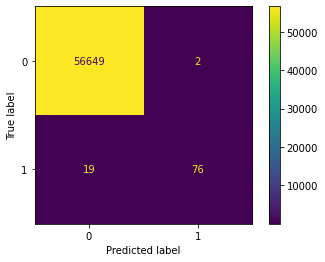

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
# This is how the predicted values compare with the actual values 
valid = pd.DataFrame(data={'Actual':y_val[100:120,], 'Predicted':y_pred[100:120,]}) # 20 values
valid

,Actual,Predicted
65186,0,0
245581,0,0
20110,0,0
125777,0,0
266502,0,0
243615,0,0
65091,0,0
20327,0,0
246503,0,0
30600,0,0
